In [38]:
'''----------------------------------------------IMPORT ------------------------------------------------------'''
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

'''----------------------------------------------PLOT SETTINGS ------------------------------------------------------'''
plt.style.use('seaborn-colorblind') # Color Scheme for plots
plt.rcParams["font.family"] = "Times New Roman" # Font style
plt.rcParams.update({'font.size': 15}) #Set font size
'''----------------------------------------------SET DATA PATHS ---------------------------------------------------- '''

data_path = 'G:\\My Drive\\Projects\\UAC\\2021_2022\\UAC_People_DashBoard_BCC Trailhead Data_Time series_SprucesN.csv'

data = pd.read_csv(data_path)

In [40]:

data['Converted Datetime'] = pd.DatetimeIndex(data['Converted Datetime'])
data = data.set_index('Converted Datetime')

In [41]:
data.head()

,People,Beacons
Converted Datetime,,
2021-12-13 22:00:00,8,2
2021-12-13 23:00:00,2,0
2021-12-14 00:00:00,1,0
2021-12-14 01:00:00,0,0
2021-12-14 02:00:00,0,0


In [42]:

dnight = data.between_time('0:00:00', '6:00:00')

In [43]:
#dnight = dnight.set_index('Converted_Date')
dmax = dnight.resample('D').max()

dmax.tail()

,People,Beacons
Converted Datetime,,
2022-02-17,7.0,0.0
2022-02-18,5.0,0.0
2022-02-19,10.0,0.0
2022-02-20,4.0,0.0
2022-02-21,39.0,0.0


In [44]:
dtot = data.resample('D').sum()
dfinal = dtot - dmax
dfinal.tail()

,People,Beacons
Converted Datetime,,
2022-02-17,371.0,0.0
2022-02-18,403.0,0.0
2022-02-19,375.0,0.0
2022-02-20,270.0,0.0
2022-02-21,124.0,0.0


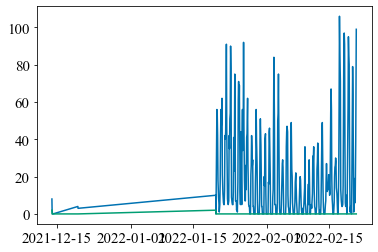

In [45]:
plt.figure()
plt.plot(data['People'])
plt.plot(data['Beacons'])
plt.show()

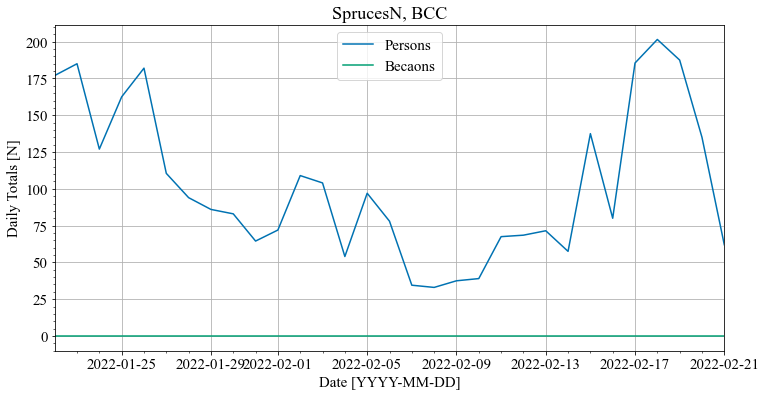

In [52]:


plt.figure(figsize=(12, 6))
plt.plot(dfinal['People'][40:]/2)
plt.plot(dtot['Beacons'][40:]/2)
plt.ylabel('Daily Totals [N]')
plt.xlabel('Date [YYYY-MM-DD]')
plt.minorticks_on()
plt.grid(b=bool, which='major', axis='both')
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('SprucesN, BCC')

plt.legend(['Persons','Becaons']) # legend in upper left side
#plt.show()
plt.savefig('Timeseries_SprucesN_BCC_People_Beacons' +'.pdf', bbox_inches='tight')

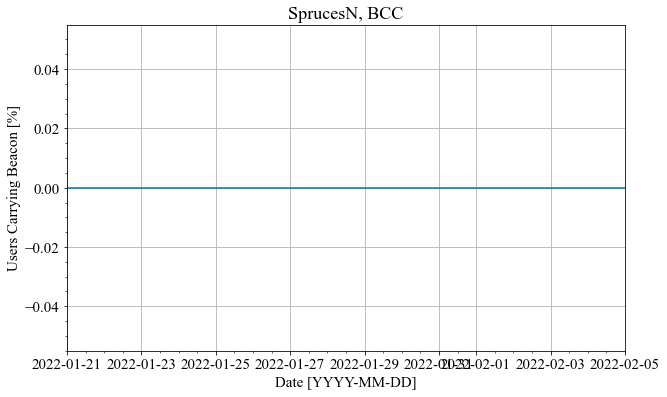

In [53]:
plt.figure(figsize=(10, 6))

plt.plot((dtot['Beacons'][:]/dfinal['People'][:55])*100)
plt.ylabel('Users Carrying Beacon [%]')
plt.xlabel('Date [YYYY-MM-DD]')
plt.minorticks_on()
plt.grid(b=bool, which='major', axis='both')
plt.autoscale(enable=True, axis='x', tight=True)
plt.title('SprucesN, BCC')
#plt.show()
plt.savefig('Timeseries_SprucesN_BCC_Beacons_Percent' +'.pdf', bbox_inches='tight')

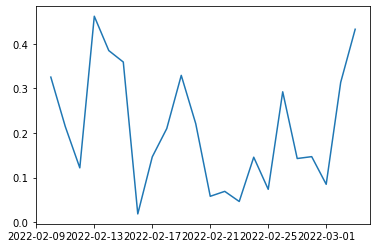

In [109]:
plt.figure()
plt.plot(dtot['Beacons'][50:100]/dfinal['People'][50:100])
plt.show()